# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# E-Commerce Data
Actual transactions from UK retailer

## About Dataset

### Context

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

### Content

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Acknowledgements

Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Image from stocksnap.io.

### Inspiration

Analyses for this dataset could include time series, clustering, classification and more. 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv("/home/nadia/Documents/DICODING/MLPemula/FInalProject/FinalProject1/data/data.csv", encoding='ISO-8859-1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### *Memahami Struktur Data*

In [3]:
data.shape

(541909, 8)

Data tersebut terdiri dari 8 kolom dan 541909 baris.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### *Menangani data yang hilang* 

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data yang hilang cukup banyak, tetapi saya memilih untuk menghapus data yang terdapat missing value karena dalam clustering ini saya ingin menemukan pola customer, jika mengisi missing value dengan nilai median maka lebih dari 135 ribu data tersimpan pada 1 customer ID.

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Pada tahap ini juga saya melakukan proses penanganan duplikasi data

In [9]:
data.duplicated().sum()

np.int64(5225)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

np.int64(0)

Jumlah baris dan kolom pada data setelah cleaning

In [12]:
data.shape

(401604, 8)

In [13]:
data.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/2011 15:27,NaN,NaN,United Kingdom
freq,542,2065,2058,NaN,543,NaN,NaN,356728
mean,NaN,NaN,NaN,12.183273,NaN,3.474064,15281.160818,NaN
std,NaN,NaN,NaN,250.283037,NaN,69.764035,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16784.000000,NaN


### *Analisis Distribusi dan Korelasi*

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

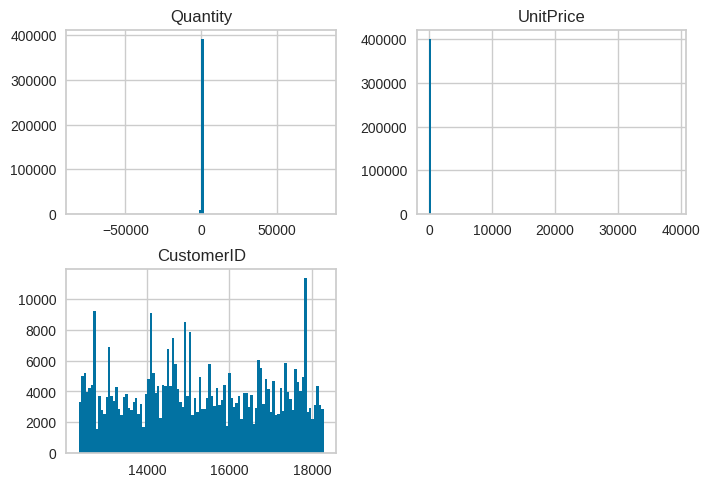

In [14]:
# data.hist()
data.hist(bins=100)

In [15]:
cat_features = data.select_dtypes([object]).columns
print(cat_features)

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')


In [16]:
# plt.figure(figsize=(14, 15))

# for i, column in enumerate(cat_features, 1):
#     plt.subplot(3,2,i)
#     sns.countplot(y=data[column])
#     plt.title(f"Distribusi {column}")

# plt.tight_layout()
# plt.show()

In [17]:
invoiceNo_df = data.groupby('InvoiceNo').nunique()
stockCode_df = data.groupby('StockCode').nunique()
description_df = data.groupby('Description').nunique()
invoiceDate_df = data.groupby('InvoiceDate').nunique()
country_df = data.groupby('Country').nunique()

In [18]:
invoiceNo_df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,7,7,3,1,5,1,1
536366,2,2,1,1,1,1,1
536367,12,12,6,1,9,1,1
536368,4,4,2,1,2,1,1
536369,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
C581484,1,1,1,1,1,1,1
C581490,2,2,2,1,2,1,1
C581499,1,1,1,1,1,1,1


In [19]:
stockCode_df

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
10002,49,1,18,49,1,40,7
10080,21,1,8,21,2,19,1
10120,29,1,12,29,1,25,2
10123C,3,1,2,3,1,3,1
10124A,5,1,3,5,1,5,1
...,...,...,...,...,...,...,...
D,65,1,6,65,75,24,4
DOT,16,1,1,16,16,1,1
M,412,1,58,409,184,276,16


In [20]:
description_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,36,1,6,36,2,31,2
50'S CHRISTMAS GIFT BAG LARGE,110,1,16,110,2,106,6
DOLLY GIRL BEAKER,135,1,14,134,2,101,11
I LOVE LONDON MINI BACKPACK,68,1,10,68,2,58,8
I LOVE LONDON MINI RUCKSACK,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,240,1,19,240,3,180,10
ZINC TOP 2 DOOR WOODEN SHELF,11,1,4,11,2,10,1
ZINC WILLIE WINKIE CANDLE STICK,189,1,16,189,3,137,9


In [21]:
invoiceDate_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
1/10/2011 10:32,1,23,23,7,10,1,1
1/10/2011 10:35,2,17,17,8,8,2,2
1/10/2011 10:44,1,1,1,1,1,1,1
1/10/2011 10:58,1,44,44,5,17,1,1
1/10/2011 11:09,1,19,19,7,10,1,1
...,...,...,...,...,...,...,...
9/9/2011 8:48,1,16,16,6,8,1,1
9/9/2011 9:03,1,14,14,7,8,1,1
9/9/2011 9:13,1,45,45,6,17,1,1


In [22]:
country_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,69,600,609,67,66,77,9
Austria,19,307,307,23,19,44,11
Bahrain,2,16,16,8,2,8,2
Belgium,119,778,785,38,119,66,25
Brazil,1,32,32,7,1,16,1
Canada,6,147,147,19,6,30,4
Channel Islands,33,430,436,25,33,55,9
Cyprus,20,498,498,29,20,56,8
Czech Republic,5,25,25,12,5,17,1


In [23]:
num_features = data.select_dtypes(include=[np.number]).columns
print(num_features)


Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


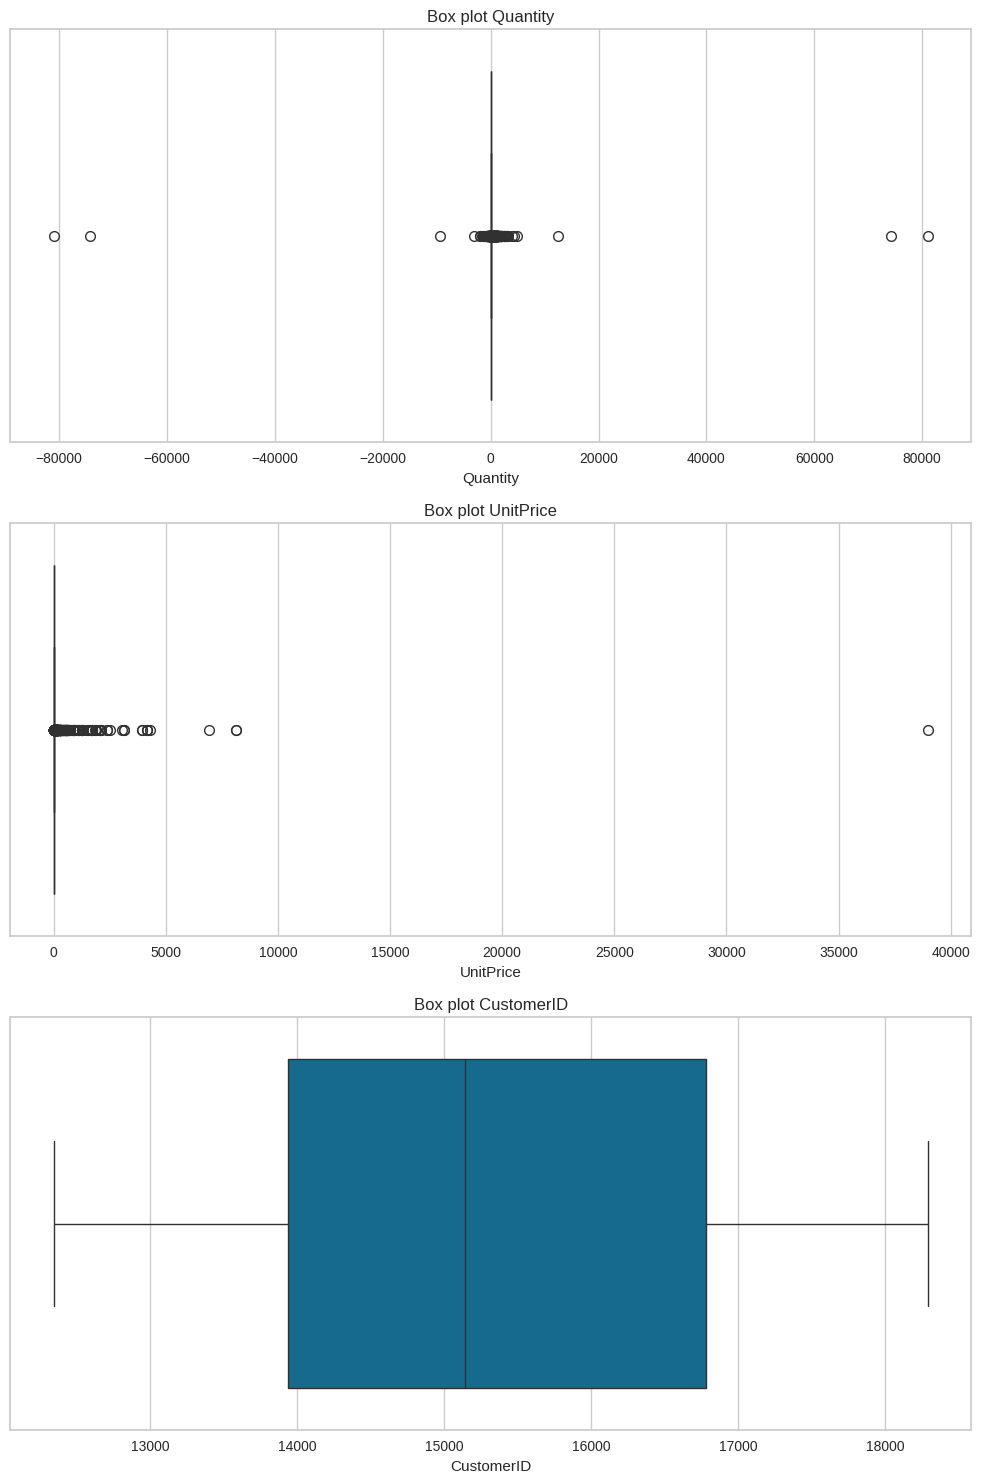

In [24]:
plt.figure(figsize=(10,15))

for i, column in enumerate(num_features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=data[column])
    plt.title(f"Box plot {column}")

plt.tight_layout()
plt.show()


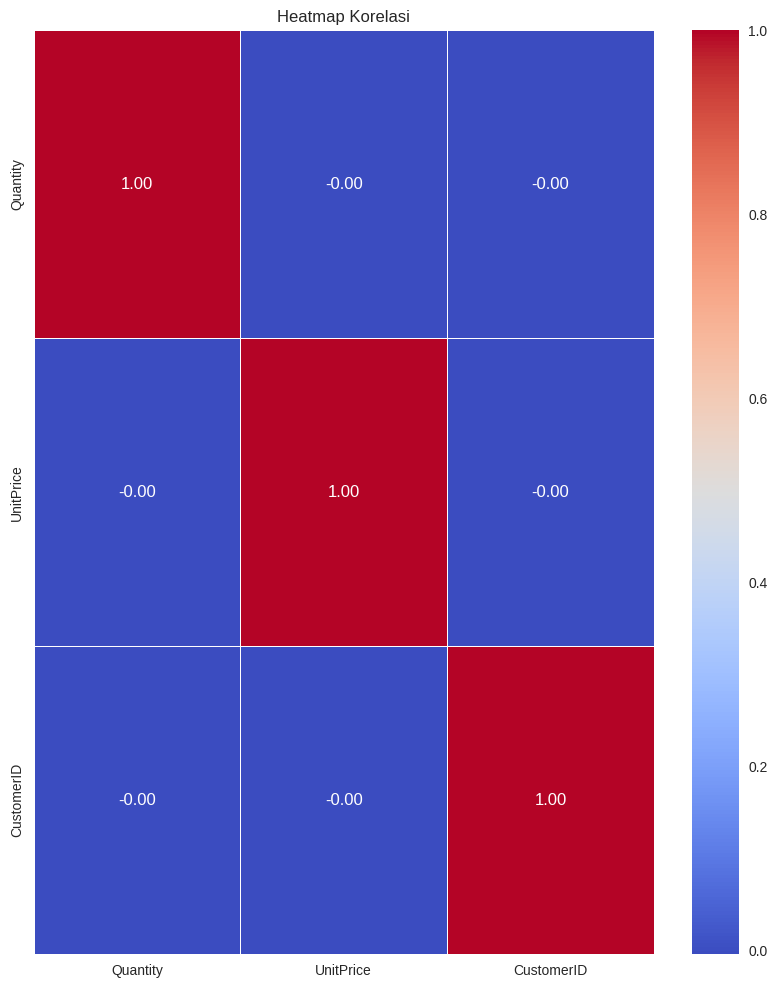

In [25]:
correlation_matrix = data[num_features].corr()

plt.figure(figsize=(10,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)
plt.title("Heatmap Korelasi")
plt.show()

tidak terdapat korelasi antara ketiga numerical features.

### *Visualisasi Data*

Fitur-fitur numerical telah divisualisasikan pada langkah sebelumnya, sementara fitur kategorikal tidak divisualisasikan karena banyaknya jumlah data. Untuk itu, fitur kategorikal ditampilkan dengan tabel dataframenya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### *Menghapus atau Menangani Data Kosong (Missing Values)*
Sudah dilakukan pada tahapan sebelumnya

### *Menghapus Data Duplikat*
Sudah dilakukan pada tahapan sebelumnya

### *Normalisasi atau Standarisasi Fitur*
Karena pada numerical feature tidak terdapat korelasi antar fitur, tidak dilakukan normalilasi atau standarisasi pada data numerik

### *Deteksi dan Penanganan Outlier*

In [27]:
numerical_data = data.select_dtypes(include=[np.number])

In [28]:
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

no_outlier_df = data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
no_outlier_df.shape

(339453, 8)

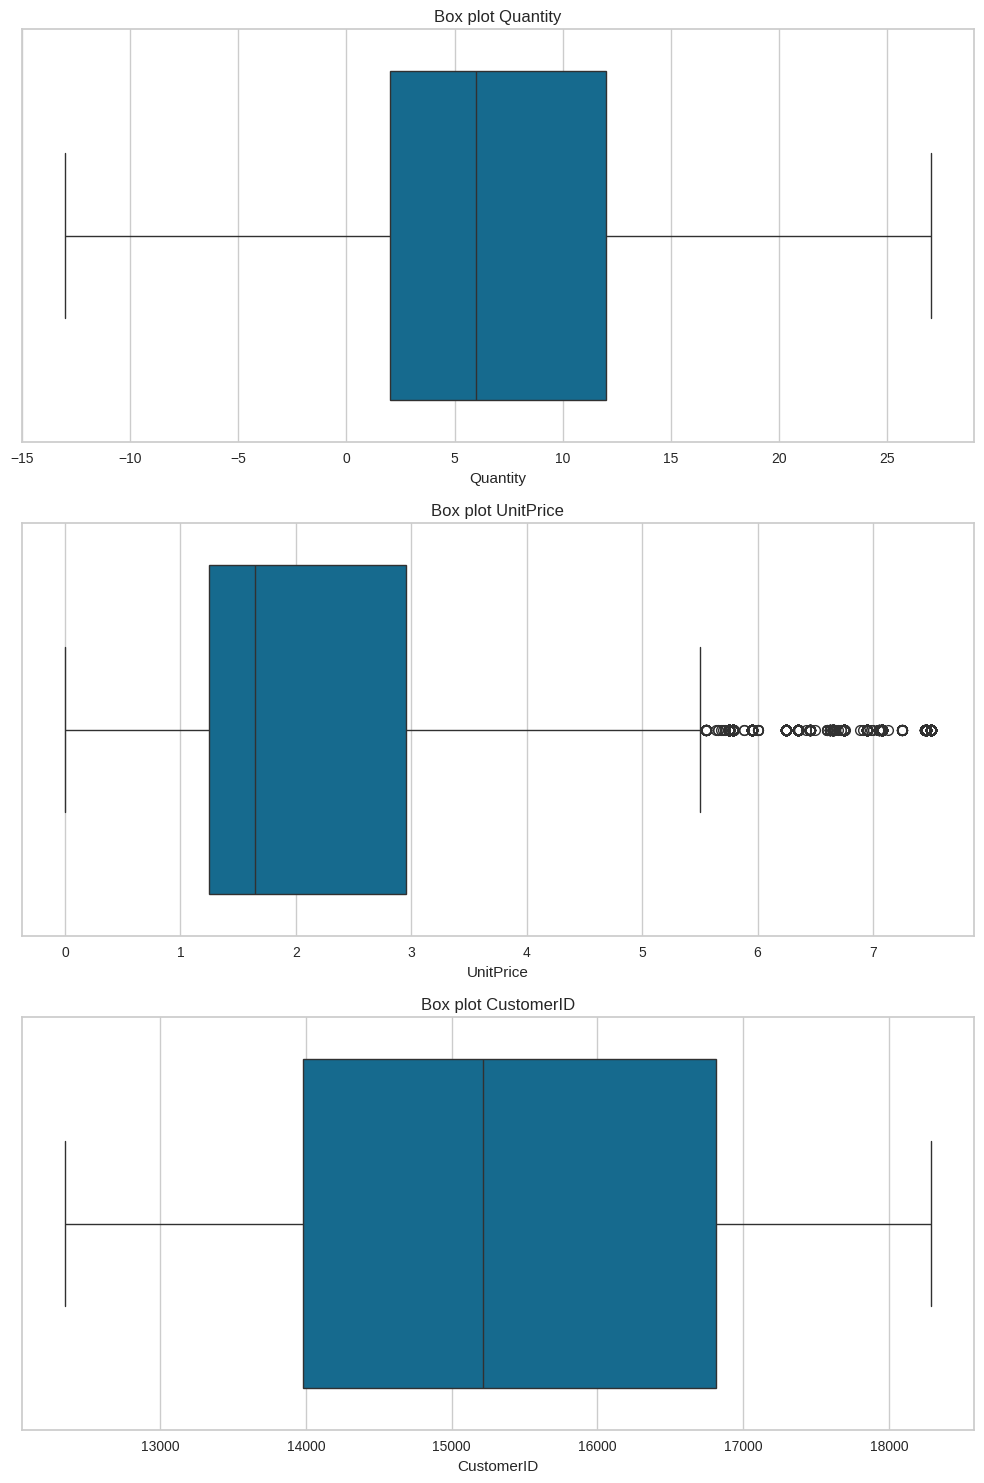

In [31]:
plt.figure(figsize=(10,15))

for i, column in enumerate(num_features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=no_outlier_df[column])
    plt.title(f"Box plot {column}")

plt.tight_layout()
plt.show()

### *Encoding Data Kategorikal*

data kategorikal pada dataset ini adalah : ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'].

Encoding akan menggunakan label encoder. Namun, 'InvoiceDate' tidak dilakukan encoding.

In [33]:
no_outlier_df.loc[:,'InvoiceDate'] = pd.to_datetime(no_outlier_df['InvoiceDate'])

In [34]:
no_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    339453 non-null  object        
 1   StockCode    339453 non-null  object        
 2   Description  339453 non-null  object        
 3   Quantity     339453 non-null  int64         
 4   InvoiceDate  339453 non-null  datetime64[ns]
 5   UnitPrice    339453 non-null  float64       
 6   CustomerID   339453 non-null  float64       
 7   Country      339453 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.3+ MB


In [38]:
label_encoder = LabelEncoder()

for column in ['InvoiceNo', 'StockCode', 'Description', 'Country']:
    no_outlier_df[column] = label_encoder.fit_transform(no_outlier_df[column])

no_outlier_df.sample(10)

/tmp/ipykernel_35402/44613191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_df[column] = label_encoder.fit_transform(no_outlier_df[column])
/tmp/ipykernel_35402/44613191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_df[column] = label_encoder.fit_transform(no_outlier_df[column])
/tmp/ipykernel_35402/44613191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
388527,12434,2427,3180,4,2011-10-10 14:37:00,1.25,16549.0,35
218311,7023,1916,1794,1,2011-06-08 12:44:00,1.65,17954.0,35
233239,7549,1875,1843,12,2011-06-20 13:08:00,1.25,13815.0,14
372631,11961,1270,1978,7,2011-10-03 09:57:00,5.79,14096.0,35
80374,2274,389,1990,3,2011-02-02 17:06:00,1.25,17337.0,35
483041,15193,1349,2222,18,2011-11-20 12:11:00,1.45,16464.0,35
467261,14722,1689,95,4,2011-11-14 15:27:00,1.25,14096.0,35
64488,1786,1420,3087,12,2011-01-20 10:48:00,1.95,12637.0,13
252332,8128,1572,2865,1,2011-07-06 11:52:00,2.95,15021.0,35
72974,2018,519,1127,24,2011-01-27 10:18:00,1.25,13089.0,35


In [40]:
no_outlier_df['Month'] = no_outlier_df['InvoiceDate'].dt.strftime('%Y-%m')

no_outlier_df.sample(10)

/tmp/ipykernel_35402/812709772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_df['Month'] = no_outlier_df['InvoiceDate'].dt.strftime('%Y-%m')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
404239,12883,821,3216,12,2011-10-18 13:12:00,1.45,12611.0,18,2011-10
491958,15452,1853,3594,12,2011-11-22 16:33:00,0.83,12775.0,23,2011-11
300020,9651,1961,2798,12,2011-08-12 16:07:00,1.25,16678.0,35,2011-08
209382,6707,966,1912,6,2011-06-01 12:19:00,1.65,16818.0,35,2011-06
131844,3940,381,287,1,2011-03-24 12:08:00,1.69,17059.0,35,2011-03
395874,12642,1286,2992,2,2011-10-13 13:35:00,4.95,18096.0,35,2011-10
121288,3610,272,2267,2,2011-03-16 13:00:00,1.25,16383.0,35,2011-03
350493,11306,999,246,6,2011-09-21 14:07:00,4.95,15290.0,35,2011-09
80811,2288,1090,1095,2,2011-02-03 11:39:00,1.25,14044.0,35,2011-02
90763,2608,430,431,1,2011-02-15 14:08:00,0.85,16431.0,35,2011-02


### *Binning (Pengelompokan Data)*

Data dikelompokkan perbulannya.

In [41]:
no_invoiceDate_df = no_outlier_df.drop(columns=["InvoiceDate"])

In [42]:
no_invoiceDate_df["Month"] = label_encoder.fit_transform(no_invoiceDate_df["Month"])

no_invoiceDate_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month
441899,13996,1987,2762,8,0.83,13772.0,35,11
74476,2066,1505,2787,24,4.95,17404.0,31,1
202656,6451,2782,482,1,0.42,14606.0,35,5
202094,6423,1419,2221,4,4.95,17811.0,35,5
185676,5790,1900,502,12,1.65,14056.0,35,5
9861,348,1233,2099,3,0.55,14081.0,35,0
425646,13523,1551,1313,1,3.95,15059.0,35,10
134636,4035,1658,1518,2,0.65,17625.0,35,3
218772,7043,168,1793,1,1.65,12748.0,35,6
50990,1482,1489,3541,25,0.42,15326.0,35,1


In [49]:
no_invoiceDate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339453 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    339453 non-null  int64  
 1   StockCode    339453 non-null  int64  
 2   Description  339453 non-null  int64  
 3   Quantity     339453 non-null  int64  
 4   UnitPrice    339453 non-null  float64
 5   CustomerID   339453 non-null  float64
 6   Country      339453 non-null  int64  
 7   Month        339453 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 MB


In [50]:
no_invoiceDate_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month
count,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000,339453.000000
mean,9039.477159,1468.892344,1874.959255,7.350022,2.203459,15312.608184,33.024439,6.866980
std,4999.479859,778.364798,1003.475042,6.890369,1.549676,1711.910209,6.454936,3.687289
min,0.000000,0.000000,0.000000,-13.000000,0.000000,12347.000000,0.000000,0.000000
25%,4608.000000,880.000000,1104.000000,2.000000,1.250000,13983.000000,35.000000,4.000000
50%,9427.000000,1446.000000,1832.000000,6.000000,1.650000,15218.000000,35.000000,8.000000
75%,13282.000000,1962.000000,2735.000000,12.000000,2.950000,16813.000000,35.000000,10.000000
max,19479.000000,3414.000000,3597.000000,27.000000,7.500000,18287.000000,36.000000,12.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [43]:
cleaned_data = no_invoiceDate_df.copy()

In [45]:
X = cleaned_data.iloc[:,[3,7]]

X

,Quantity,Month
0,6,0
1,6,0
2,8,0
3,6,0
4,6,0
...,...,...
541904,12,12
541905,6,12
541906,4,12
541907,4,12


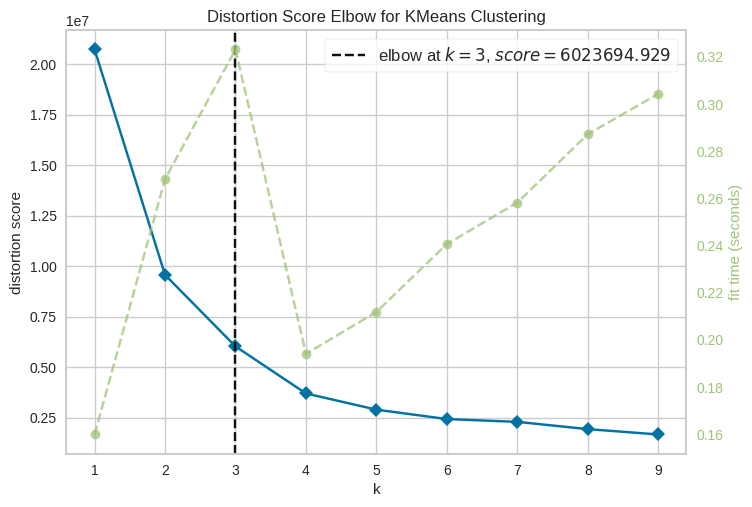

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1,10))

visualizer.fit(X)

visualizer.show()

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

k = 3

# purchase_frequency = cleaned_data.groupby("CustomerID").size()

# total_spending = cleaned_data.groupby("CustomerID").apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# customer_features = pd.DataFrame({
#     'purchase_frequency': purchase_frequency,
#     'total_spending': total_spending
# }).fillna(0)

# purchase_frequency

In [59]:
# total_spending

In [60]:
X

,Quantity,Month
0,6,0
1,6,0
2,8,0
3,6,0
4,6,0
...,...,...
541904,12,12
541905,6,12
541906,4,12
541907,4,12


In [61]:
def analyze_cluster(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster: ")

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        # mean_purchase_frequency = cluster_data['purchase_frequency'].mean()
        # mean_total_spending = cluster_data['total_spending'].mean()

        # print(f"\nCluster {cluster_id + 1}:")
        # print(f"Rata-rata Frekuensi Pembelian: {mean_purchase_frequency:.2f}")
        # print(f"Rata-rata Total Pengeluaran: {mean_total_spending:.2f}")

        mean_month = cluster_data['Month'].mean()
        mean_quantity = cluster_data['Quantity'].mean()


        print(f"Rata-rata bulan cluster_{cluster_id} = {mean_month:.2f}")
        print(f"Rata-rata quantity cluster_{cluster_id} = {mean_quantity:.2f}")

        # print(f"Rata-rata bulan cluster_{cluster_id} = {cluster_data[:,0].mean():.2f}")
        # print(f"Rata-rata quantity cluster_{cluster_id} = {cluster_data[:,1].mean():.2f}")

# X = customer_features.iloc[:, :]

analyze_cluster(X, labels, k)
# customer_features

Analisis Karakteristik Setiap Cluster: 
Rata-rata bulan cluster_0 = 6.91
Rata-rata quantity cluster_0 = 2.80
Rata-rata bulan cluster_1 = 6.78
Rata-rata quantity cluster_1 = 11.23
Rata-rata bulan cluster_2 = 6.83
Rata-rata quantity cluster_2 = 23.33


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.